In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import datetime as dt


In [ ]:
df = pd.read_csv('/content/retail_sales_dataset.csv')

Data Cleaning

In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
print(df.isnull().sum())
df.drop_duplicates(inplace=True)


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


Descriptive Statistics

In [ ]:
print(df.describe())
print("Mean Total Amount:", df['Total Amount'].mean())
print("Median:", df['Total Amount'].median())
print("Mode:", df['Total Amount'].mode()[0])
print("Std Deviation:", df['Total Amount'].std())


       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

Time Series Analysis

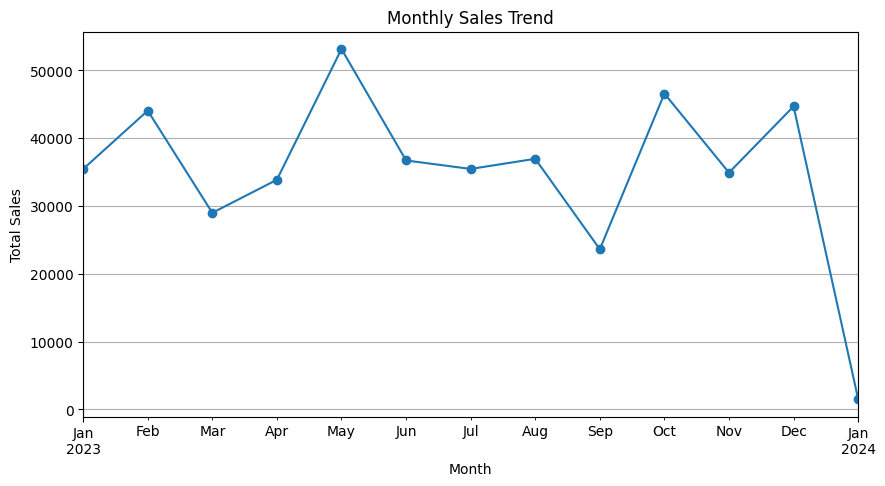

In [ ]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Amount'].sum()

monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', figsize=(10,5))
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()


Customer & Product Analysis

Text(0.5, 1.0, 'Total Sales by Gender')

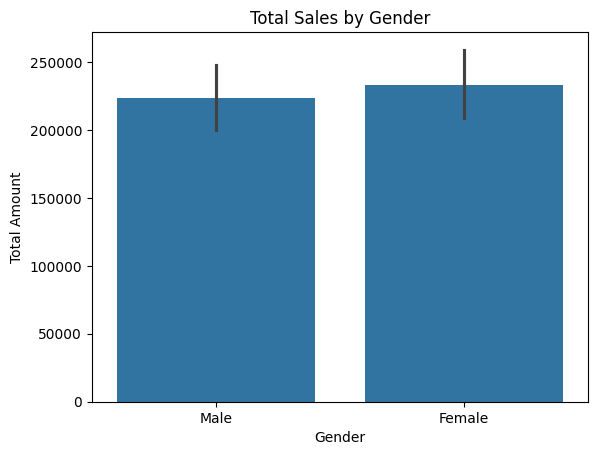

In [ ]:
sns.barplot(data=df, x='Gender', y='Total Amount', estimator=sum)
plt.title('Total Sales by Gender')


<Axes: title={'center': 'Top 5 Customers by Sales'}, ylabel='Customer ID'>

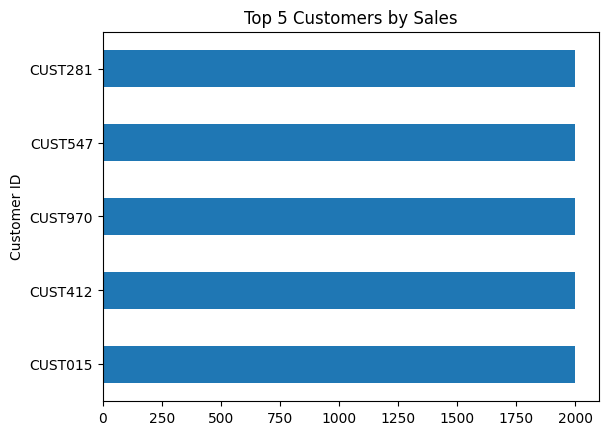

In [ ]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)
top_customers.plot(kind='barh', title='Top 5 Customers by Sales')


Text(0.5, 1.0, 'Products by Quantity Sold')

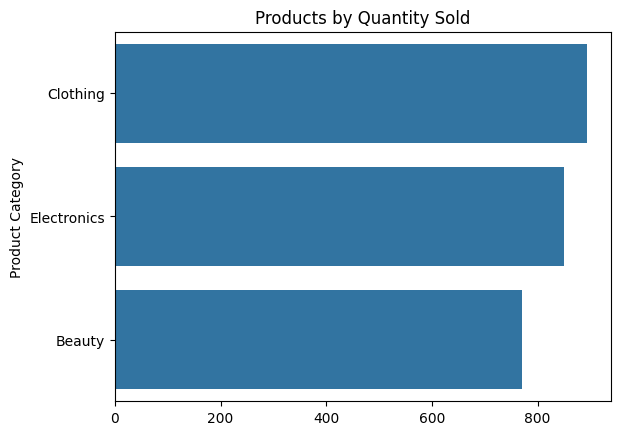

In [ ]:
top_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Products by Quantity Sold")


Text(0.5, 1.0, 'Customer Age vs Purchase Amount')

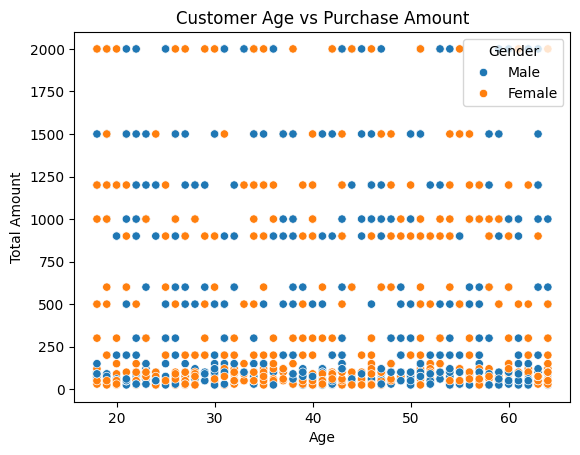

In [ ]:
sns.scatterplot(data=df, x='Age', y='Total Amount', hue='Gender')
plt.title("Customer Age vs Purchase Amount")


 Correlation and Heatmap

Text(0.5, 1.0, 'Correlation Matrix')

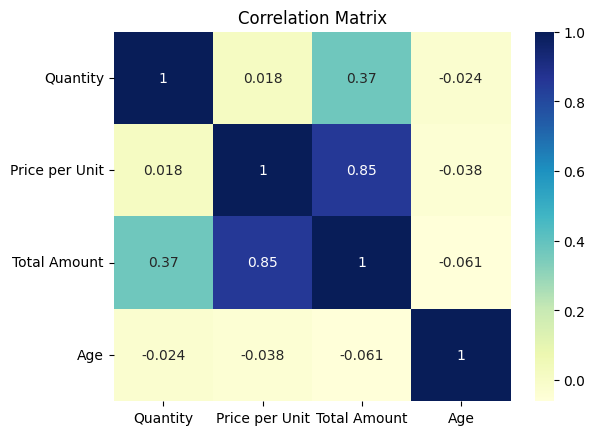

In [ ]:
sns.heatmap(df[['Quantity', 'Price per Unit', 'Total Amount', 'Age']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')


Recommendations:
Female customers spend more on Clothing focus marketing efforts accordingly.

November has the highest sales – increase promotions during this period.

Electronics have fewer sales – consider discounts to improve.

Target top 5 customers with loyalty programs.